In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('winequality-red.csv',sep=';')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.duplicated().sum()

240

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
x = data.drop(columns='quality')

In [14]:
y = data['quality']

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [17]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [18]:
model.score(xtrain,ytrain)

1.0

In [19]:
ypred = model.predict(xtest)

<AxesSubplot:>

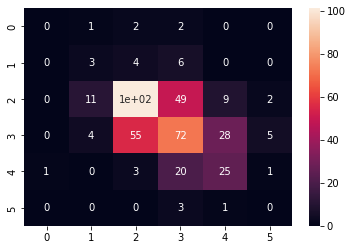

In [24]:
from sklearn.metrics import confusion_matrix as cm
sns.heatmap(cm(ytest,ypred),annot=True)

In [27]:
model.score(xtest,ytest)

0.49264705882352944

[Text(0.5250935801205948, 0.9761904761904762, 'X[10] <= 10.15\ngini = 0.649\nsamples = 951\nvalue = [5, 40, 405, 371, 117, 13]'),
 Text(0.35425518620344915, 0.9285714285714286, 'X[6] <= 91.5\ngini = 0.523\nsamples = 484\nvalue = [4, 24, 305, 134, 15, 2]'),
 Text(0.22663084228942765, 0.8809523809523809, 'X[9] <= 0.575\ngini = 0.568\nsamples = 396\nvalue = [4, 23, 226, 126, 15, 2]'),
 Text(0.0902274431392152, 0.8333333333333334, 'X[6] <= 88.5\ngini = 0.486\nsamples = 173\nvalue = [2, 17, 118, 34, 2, 0]'),
 Text(0.08622844288927768, 0.7857142857142857, 'X[10] <= 9.75\ngini = 0.475\nsamples = 170\nvalue = [2, 17, 118, 31, 2, 0]'),
 Text(0.03449137715571107, 0.7380952380952381, 'X[10] <= 9.05\ngini = 0.396\nsamples = 117\nvalue = [1, 12, 89, 14, 1, 0]'),
 Text(0.007998000499875032, 0.6904761904761905, 'X[7] <= 0.998\ngini = 0.72\nsamples = 5\nvalue = [1, 2, 1, 1, 0, 0]'),
 Text(0.003999000249937516, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.01199700

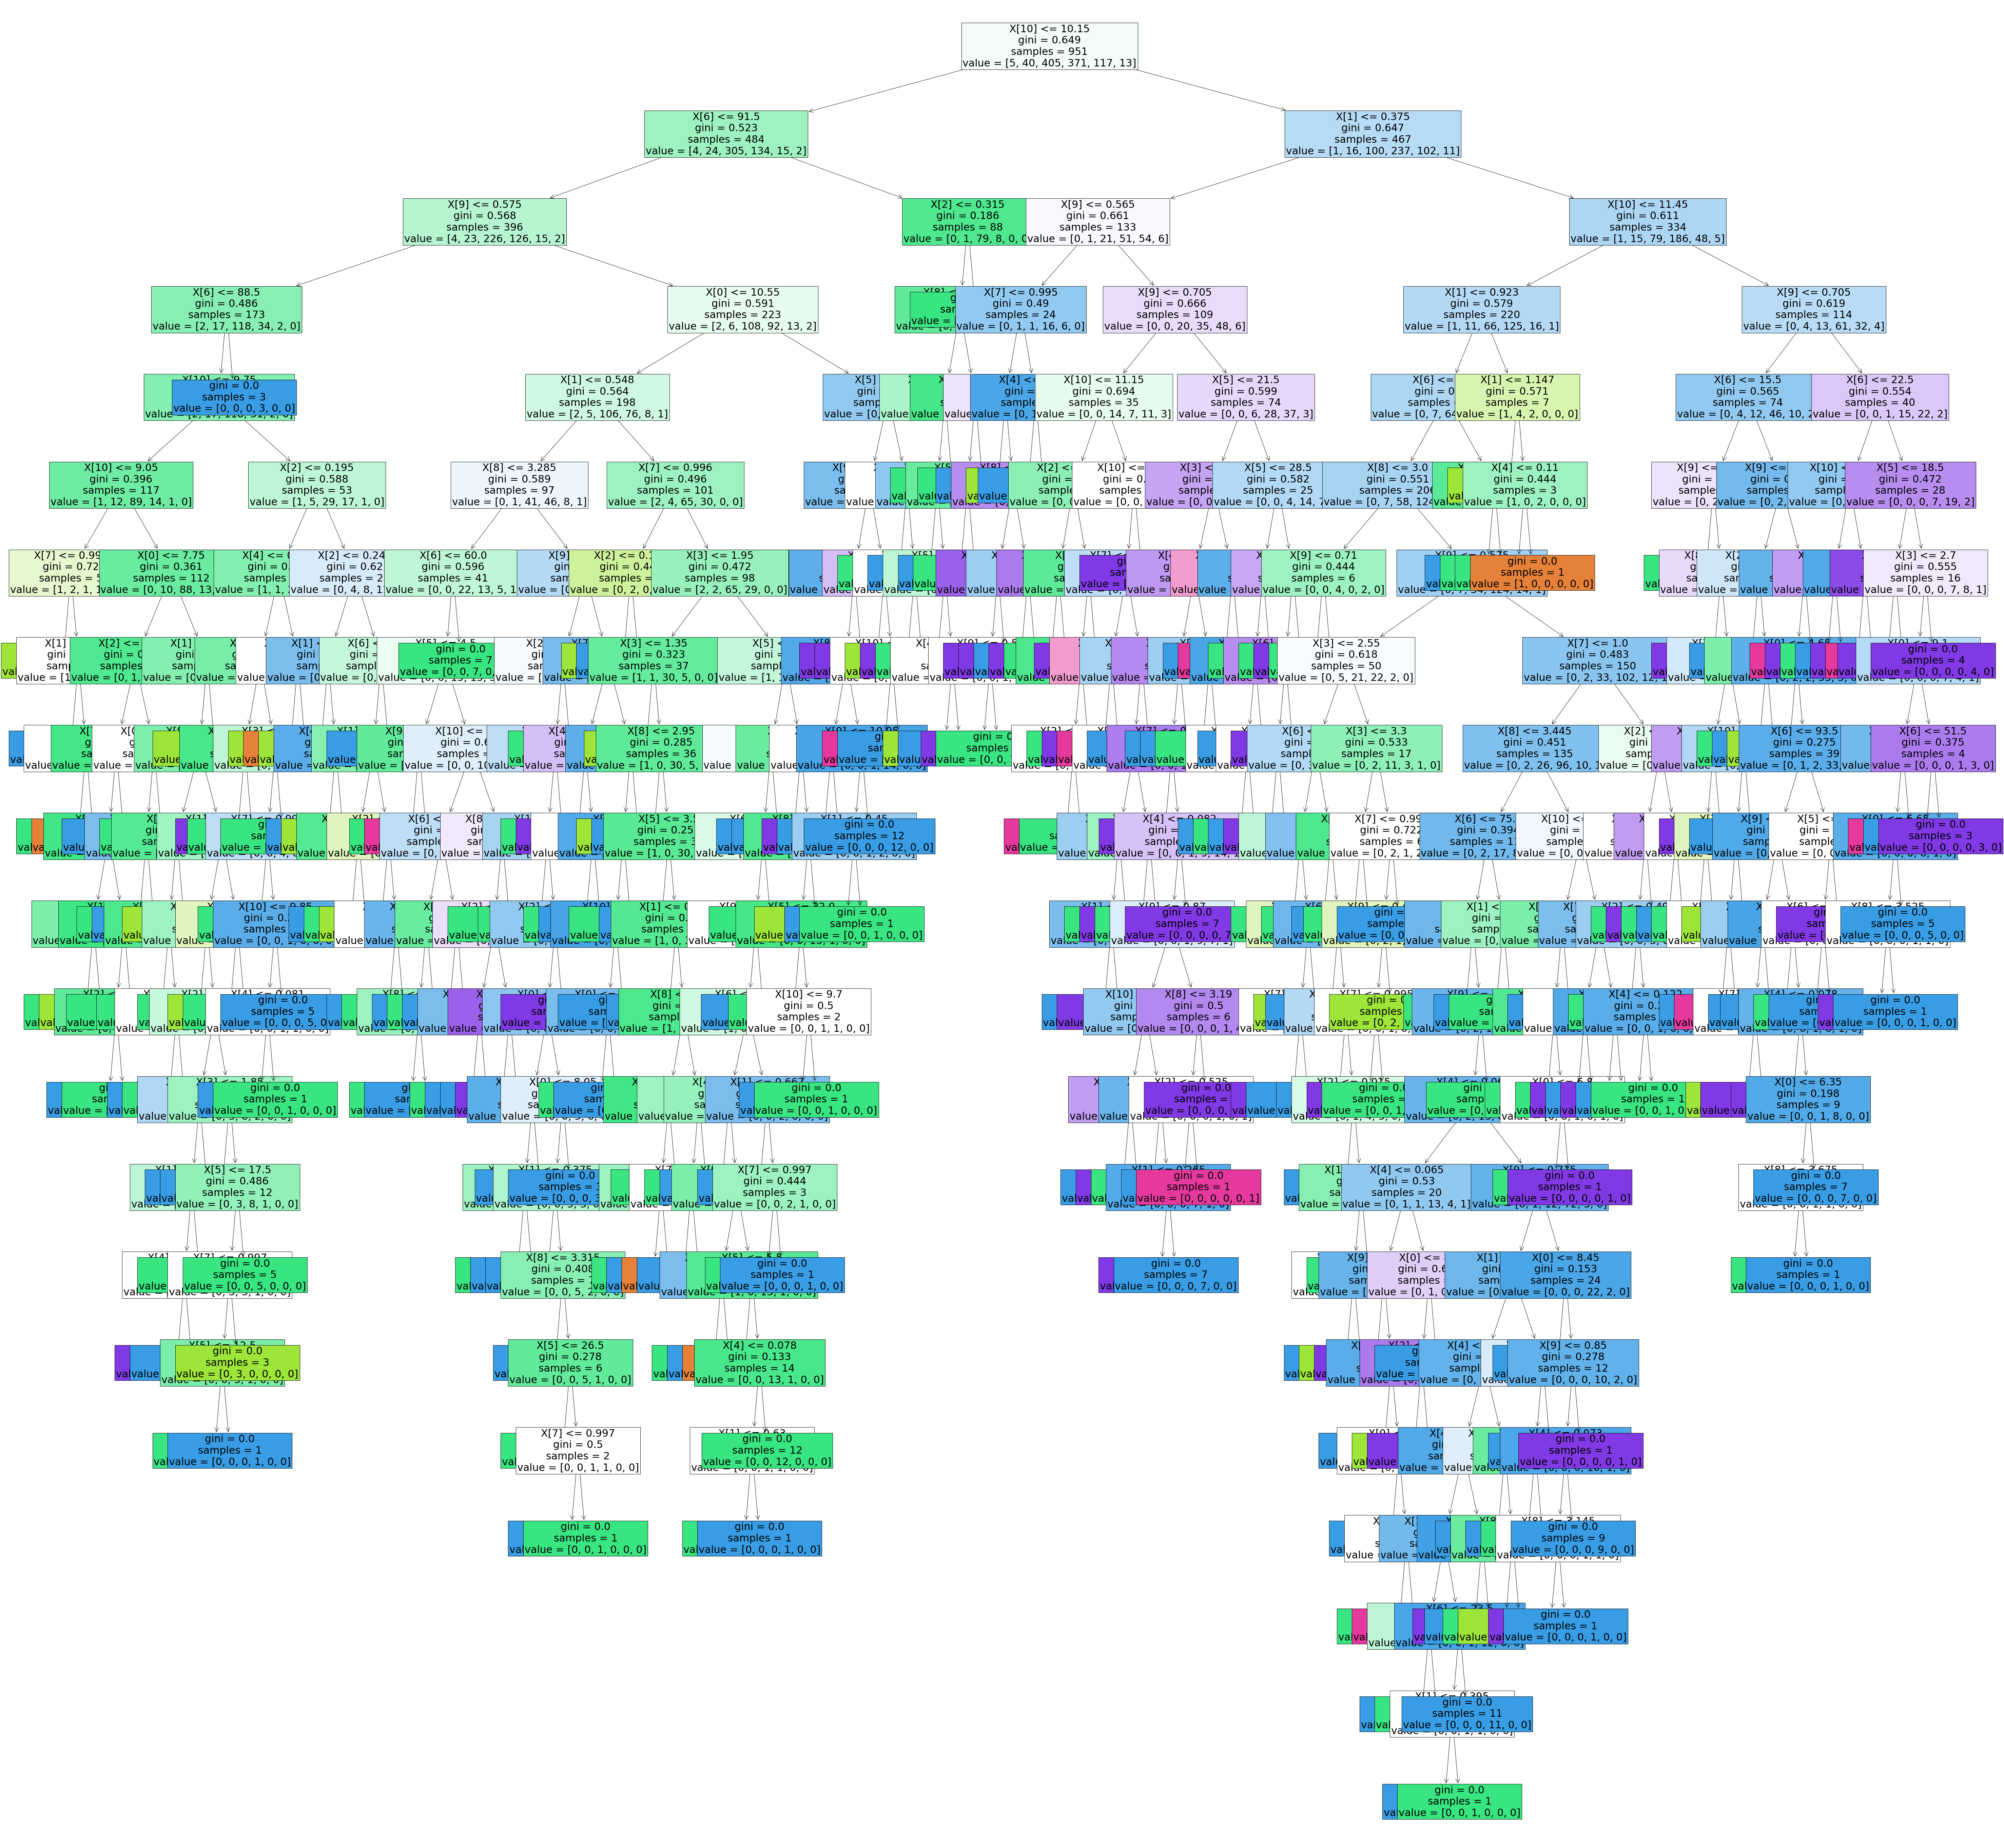

In [35]:
from sklearn import tree
plt.figure(figsize=(100,100))
plt.rcParams.update({'font.size': 30})
tree.plot_tree(model,filled=True,fontsize=30)